Cтворити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

In [3]:
import keras as k
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

In [30]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()
    
    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [5]:
from keras.datasets import fashion_mnist
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


Base model

In [7]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), verbose=0)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


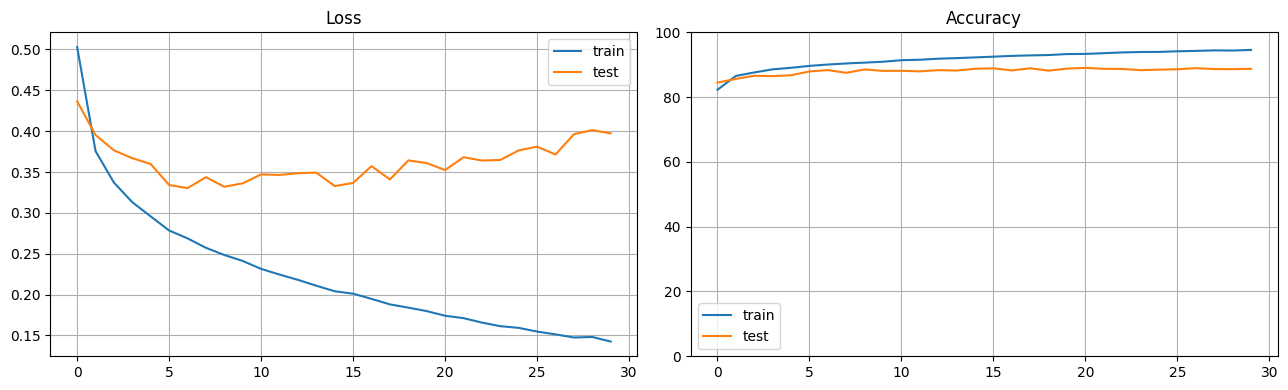

In [14]:
plot_history(history)

In [20]:
result_collect = {}
history_collect = {}

In [17]:
activation_functions = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

In [27]:
for activator in activation_functions:
    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = activator, name = 'Hidden_1'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=k.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=30,
        validation_data=(x_test, y_test),
        verbose=1,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[activator] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    result_collect[activator] = [train_loss, train_acc, test_loss, test_acc]

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7760 - loss: 0.6440 - val_accuracy: 0.8292 - val_loss: 0.4872
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8415 - loss: 0.4607 - val_accuracy: 0.8301 - val_loss: 0.4880
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8490 - loss: 0.4344 - val_accuracy: 0.8322 - val_loss: 0.4892
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8498 - loss: 0.4281 - val_accuracy: 0.8313 - val_loss: 0.4849
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8512 - loss: 0.4240 - val_accuracy: 0.8397 - val_loss: 0.4630
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8542 - loss: 0.4202 - val_accuracy: 0.8132 - val_loss: 0.5333
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8504 - loss: 0.4191 - val_accuracy: 0.8401 - val_loss: 0.4554
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8550 - loss: 0.4107 -

In [28]:
pd.DataFrame(result_collect)

,linear,relu,tanh,elu,softplus,sigmoid
0,0.372180,0.219613,0.206123,0.220149,0.220033,0.189811
1,0.868683,0.919550,0.922583,0.917217,0.916917,0.930833
2,0.441708,0.335575,0.332103,0.329790,0.326774,0.317145
3,0.844700,0.881400,0.883600,0.883300,0.888000,0.887600


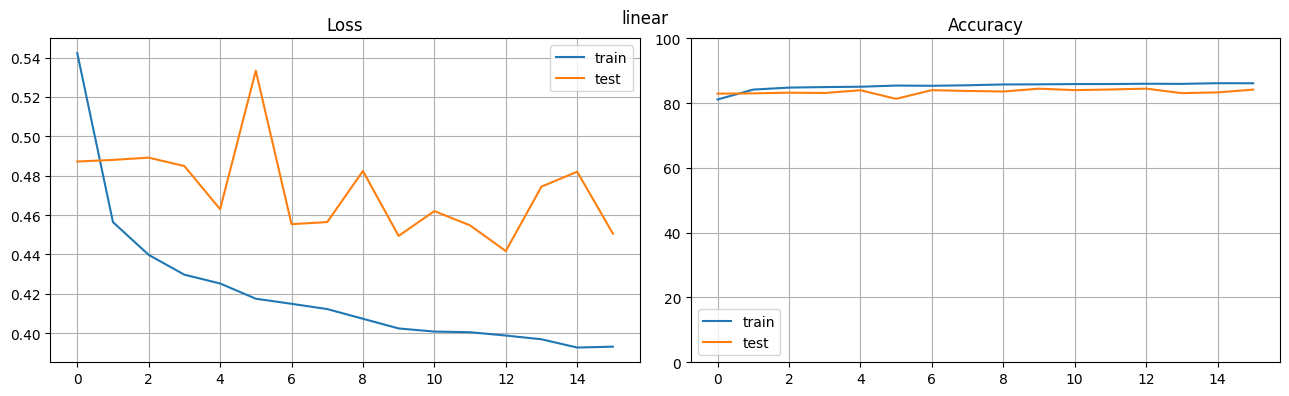

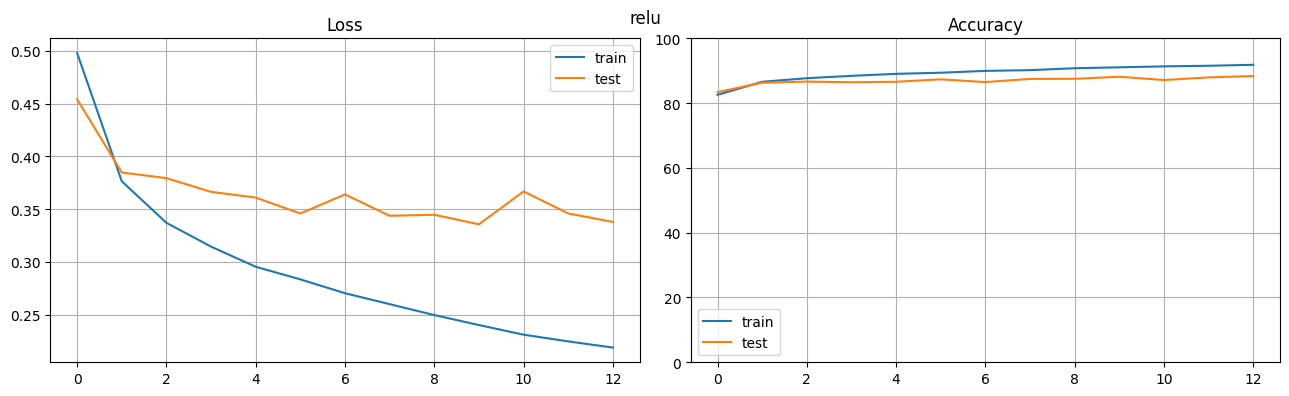

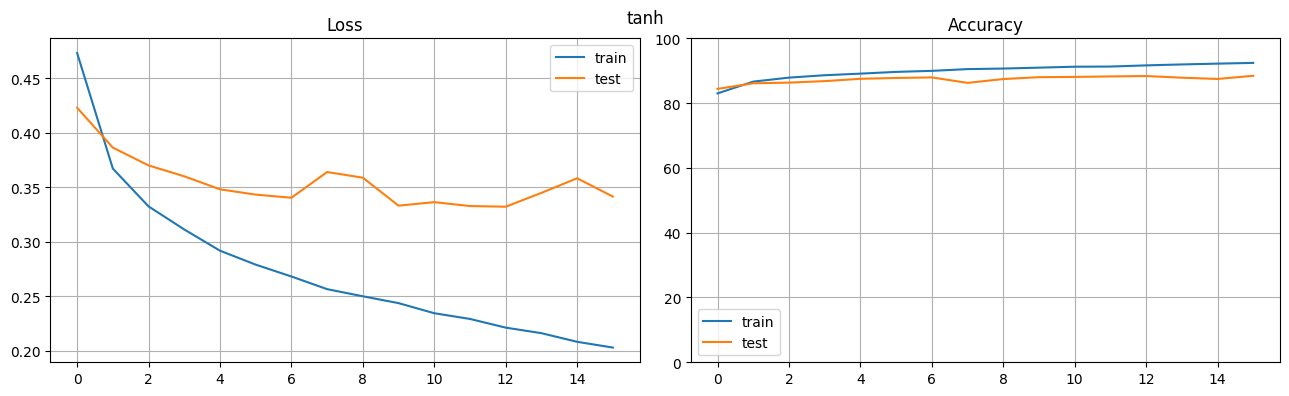

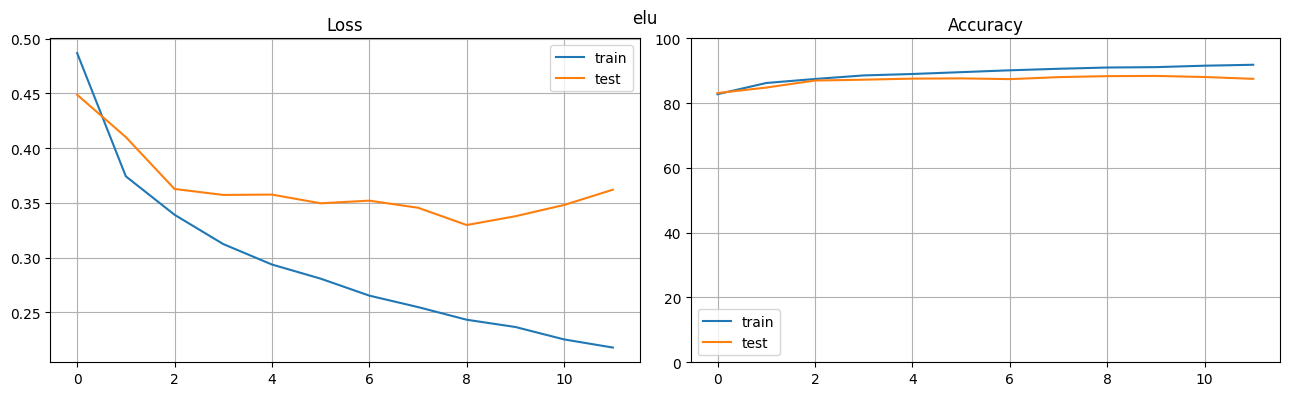

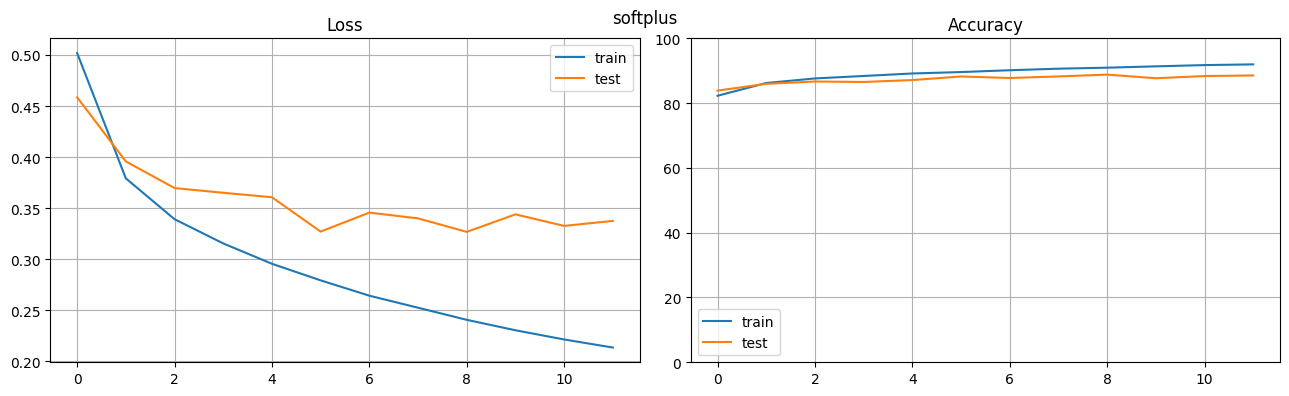

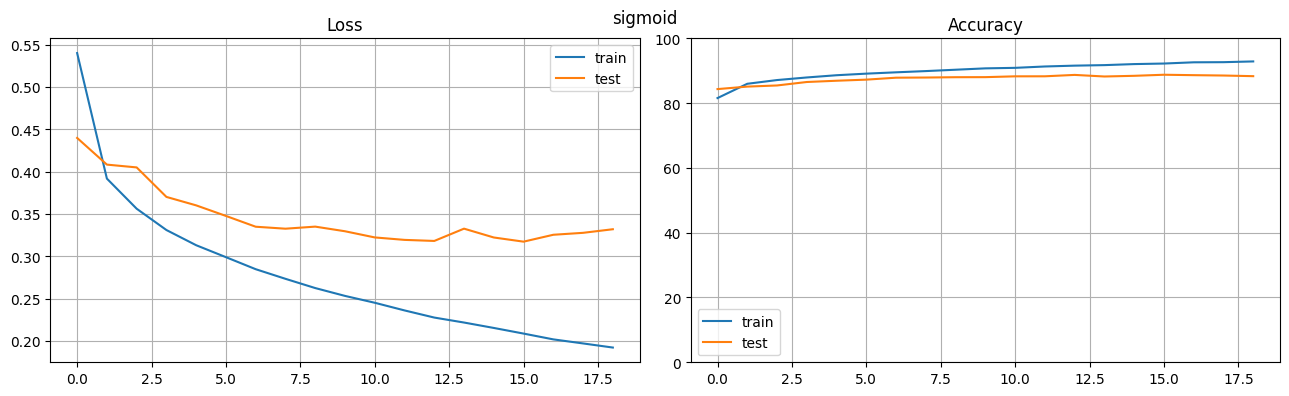

In [31]:
for i in history_collect:
    plot_history(history_collect[i], i)

In [52]:
result_collect = {}
history_collect = {}

In [50]:
activation_functions = [
    'tanh',
    'softplus',
    'sigmoid'
]

optimizers_list = [
    k.optimizers.Adam,
    k.optimizers.Adagrad,
    k.optimizers.AdamW,
    k.optimizers.Adamax,
    k.optimizers.Ftrl,
    k.optimizers.Lion,
    k.optimizers.Nadam,
    k.optimizers.RMSprop,
    k.optimizers.SGD
]

In [53]:
n = product(activation_functions, optimizers_list)

for idx, i in enumerate(n):
    activator, optimizer = i

    print(f" {idx=} {activator=} {optimizer.__name__=}")

    model = k.models.Sequential([
        k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
        k.layers.Dense(128, activation = activator, name = 'Hidden_1'),
        k.layers.Dense(10, activation = 'softmax', name = 'Output')
    ])

    model.compile(
        loss= k.losses.SparseCategoricalCrossentropy,
        optimizer=optimizer(learning_rate=0.001),
        metrics=['accuracy']
    )

    history_model = model.fit(
        x_train,
        y_train,
        epochs=20, 
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
        ],
    )

    history_collect[f"({activator=} {optimizer.__name__=}"] = history_model

    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test,)
    result_collect[f"({activator=} {optimizer.__name__=}"] = [train_loss, train_acc, test_loss, test_acc]

 idx=0 activator='tanh' optimizer.__name__='Adam'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9063 - loss: 0.2555
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8774 - loss: 0.3404
 idx=1 activator='tanh' optimizer.__name__='Adagrad'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8444 - loss: 0.4532
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.4808
 idx=2 activator='tanh' optimizer.__name__='AdamW'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9082 - loss: 0.2490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3307
 idx=3 activator='tanh' optimizer.__name__='Adamax'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8957 - loss: 0.2910
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8729 - loss: 0.3522
 idx=4 activator='tanh' optimizer.__name__='Ftrl'
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7958 - loss: 0.5838
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7838

In [58]:
pd.DataFrame({k: v for k, v in sorted(result_collect.items(), key=lambda item: item[1][3], reverse = True)})

,(activator='sigmoid' optimizer.__name__='Adam',(activator='softplus' optimizer.__name__='Adam',(activator='softplus' optimizer.__name__='AdamW',(activator='softplus' optimizer.__name__='Nadam',(activator='tanh' optimizer.__name__='Nadam',(activator='tanh' optimizer.__name__='RMSprop',(activator='softplus' optimizer.__name__='Adamax',(activator='sigmoid' optimizer.__name__='AdamW',(activator='tanh' optimizer.__name__='AdamW',(activator='tanh' optimizer.__name__='Adam',...,(activator='tanh' optimizer.__name__='Lion',(activator='tanh' optimizer.__name__='Adagrad',(activator='tanh' optimizer.__name__='SGD',(activator='softplus' optimizer.__name__='Adagrad',(activator='softplus' optimizer.__name__='SGD',(activator='sigmoid' optimizer.__name__='Adagrad',(activator='tanh' optimizer.__name__='Ftrl',(activator='sigmoid' optimizer.__name__='SGD',(activator='softplus' optimizer.__name__='Ftrl',(activator='sigmoid' optimizer.__name__='Ftrl'
0,0.206100,0.208814,0.220120,0.209238,0.219532,0.222987,0.249353,0.244890,0.251253,0.256246,...,0.442843,0.454984,0.471199,0.489895,0.501864,0.646503,0.583972,0.693664,0.718530,1.302476
1,0.925850,0.922667,0.916000,0.921517,0.920733,0.918783,0.909467,0.910717,0.907000,0.906250,...,0.843267,0.843150,0.837967,0.834050,0.827717,0.790033,0.794717,0.768667,0.743117,0.559117
2,0.318615,0.329208,0.325215,0.330868,0.328687,0.333297,0.334608,0.325935,0.332967,0.337674,...,0.485363,0.486042,0.498587,0.516677,0.527330,0.664188,0.607897,0.709792,0.731714,1.306305
3,0.888300,0.885900,0.885200,0.884700,0.884000,0.883400,0.882500,0.882100,0.880700,0.879500,...,0.828400,0.828000,0.826600,0.821200,0.817800,0.779500,0.779400,0.757800,0.737100,0.558100


## Change model

In [59]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
    k.layers.Dropout(0.3),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_2'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=k.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [62]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), verbose=0)

d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


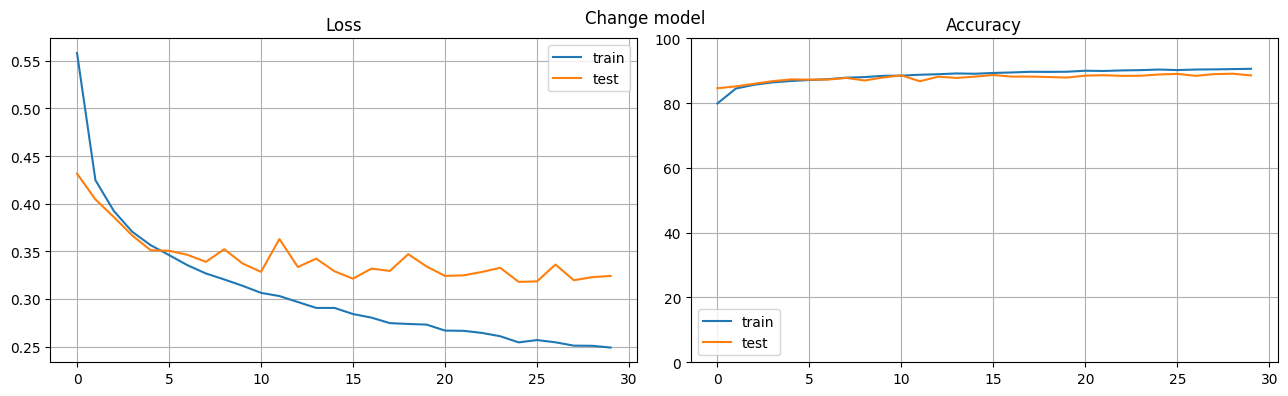

In [63]:
plot_history(history, "Change model")

## HipperParam

In [6]:
result_collect = {}
history = []


In [7]:
neirons_list = [64, 128]

learning_rates = [0.002]

activation_functions = [
    'linear',
    'relu',
    'tanh',
    'elu',
    'softplus',
    'sigmoid'
]

epoh_list = [30]

bach_size_list = [32, 128] # 32 is default

optimizers_list = [
    k.optimizers.Adam(),
    k.optimizers.Adagrad,
    # k.optimizers.AdamW,
    # k.optimizers.Adamax,
    # k.optimizers.Ftrl,
    # k.optimizers.Lion,
    # k.optimizers.Nadam,
    # k.optimizers.RMSprop,
    k.optimizers.SGD
]

In [8]:

n = product(
    neirons_list, learning_rates, activation_functions, epoh_list, bach_size_list, optimizers_list
)

for idx, i in enumerate(n):
    neirons, learning_rate, activator, epochs, batch_size, optimizer = i
    print(f" {idx=} {neirons=} {learning_rate=} {activator=} {epochs=} {batch_size=} {optimizer.__name__=}")

    model = k.models.Sequential(
        [
            k.layers.Flatten(input_shape=(28, 28)),
            k.layers.Dense(neirons, activation=activator, name="Hidden_1"),
            k.layers.Dense(10, activation="softmax", name="Output"),
         ]
    )

    model.compile(
        loss=k.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizer(learning_rate=learning_rate),
        # metrics=[k.metrics.SparseCategoricalAccuracy()],
        metrics=["accuracy"]
    )

    result = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_loss", patience=3, restore_best_weights=True
            ),
             k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=3, restore_best_weights=True
            ),
        ],
    )

    history.append(result)

    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    result_collect[idx] = [neirons, learning_rate, activator, epochs, batch_size, optimizer.__name__, train_loss, train_acc, test_loss, test_acc]
    # result_collect[(learning_rate, activator, epochs, batch_size, optimizer)] = result

 idx=0 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=32 optimizer.__name__='Adam'


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 idx=1 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=32 optimizer.__name__='Adagrad'
 idx=2 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=32 optimizer.__name__='SGD'
 idx=3 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=128 optimizer.__name__='Adam'
 idx=4 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=128 optimizer.__name__='Adagrad'
 idx=5 neirons=64 learning_rate=0.002 activator='relu' epochs=30 batch_size=128 optimizer.__name__='SGD'
 idx=6 neirons=64 learning_rate=0.002 activator='tanh' epochs=30 batch_size=32 optimizer.__name__='Adam'
 idx=7 neirons=64 learning_rate=0.002 activator='tanh' epochs=30 batch_size=32 optimizer.__name__='Adagrad'
 idx=8 neirons=64 learning_rate=0.002 activator='tanh' epochs=30 batch_size=32 optimizer.__name__='SGD'
 idx=9 neirons=64 learning_rate=0.002 activator='tanh' epochs=30 batch_size=128 optimizer.__name__='Adam'
 idx=10 neirons=64 learning_rate=0.002 activa

In [ ]:
pd.DataFrame(result_collect).melt(id_vars=["neirons", "learning_rate", "activator", "epochs", "batch_size", "optimizer"], value_vars=[ "train_loss", "train_acc", "test_loss", "test_acc"])

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,64,64,64,64,64,64,64,64,64,64,...,128,128,128,128,128,128,128,128,128,128
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,relu,relu,relu,relu,relu,relu,tanh,tanh,tanh,tanh,...,softplus,softplus,softplus,softplus,sigmoid,sigmoid,sigmoid,sigmoid,sigmoid,sigmoid
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,32,32,32,128,128,128,32,32,32,128,...,32,128,128,128,32,32,32,128,128,128
5,Adam,Adagrad,SGD,Adam,Adagrad,SGD,Adam,Adagrad,SGD,Adam,...,SGD,Adam,Adagrad,SGD,Adam,Adagrad,SGD,Adam,Adagrad,SGD
6,0.308794,0.414347,0.409773,0.220106,0.458348,0.516873,0.319338,0.407807,0.398103,0.268856,...,0.428798,0.241338,0.483686,0.528069,0.25333,0.503335,0.524114,0.204838,0.617388,0.76052
7,0.886633,0.858883,0.859267,0.9187,0.846133,0.827233,0.883233,0.857517,0.859217,0.900467,...,0.852883,0.912167,0.834667,0.819217,0.907033,0.82875,0.818233,0.925533,0.7935,0.755483
8,0.3677,0.44906,0.448016,0.340523,0.489055,0.545569,0.380507,0.443821,0.436501,0.348731,...,0.463376,0.343894,0.509718,0.551967,0.334058,0.527839,0.547269,0.31781,0.635774,0.773909
9,0.8688,0.8435,0.8435,0.8816,0.8308,0.8139,0.8611,0.8455,0.8438,0.8758,...,0.835,0.8803,0.822,0.8079,0.8781,0.8163,0.8056,0.8883,0.7829,0.7459


: 

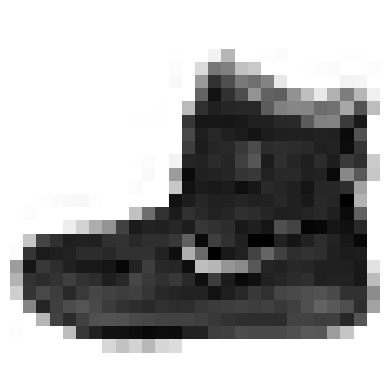

In [17]:
img_size = 28
plt.imshow(x_train[0].reshape(img_size, img_size), cmap = 'gray_r')
plt.axis('off')
plt.show()